## Interpreting abundances with chempy

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [3]:
data = Table.read('../data/STs_for_chempy.fits', format='fits')
el_names = data.colnames[3::2] # magic
err_names = data.colnames[4::2]


In [4]:
from Chempy.data_to_test import produce_wildcard_stellar_abundances

i = 0 # test
produce_wildcard_stellar_abundances(stellar_identifier = data['star_name'][i], 
                                     age_of_star = data['age'][i],
                                     sigma_age = data['age_err'][i],
                                     element_symbols = el_names, 
                                     element_abundances = data[el_names][i],
                                     element_errors = data[err_names][i])

In [6]:
from Chempy.parameter import ModelParameters
from Chempy.cem_function import cem

a = ModelParameters()
a.testing_output = True
a.summary_pdf = True
a.stellar_identifier = data['star_name'][i]
a.observational_constraints_index = ['wildcard']

[-2.29 -2.75 -0.8  -0.3   3.5   0.5   0.3 ]


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/records.py:513: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.15 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/Chempy/making_abundances.py:54: RuntimeWarning: divide by zero encountered in log10
  cube_abundances[item] = np.where(cube_abundances[item] == 0. , -np.inf, np.log10(cube_abundances[item]) + 12.)


model_temp/  already exists. Content might be overwritten
l:  -20051.207775042985 pr:  0.0 po:  -20051.207775042985


<Figure size 432x288 with 0 Axes>

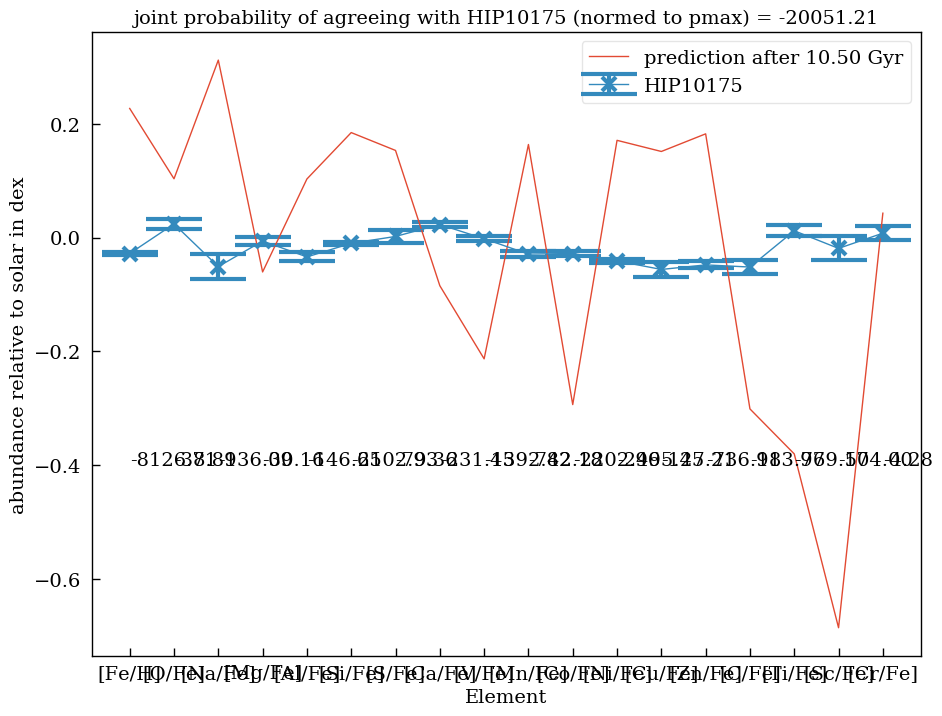

In [7]:
posterior, blobs = cem(a.p0,a)

In [8]:
from Chempy.wrapper import mcmc
a.testing_output = False
a.summary_pdf = False